In [ ]:
import pandas as pd
import numpy as np
import csv

### 1. Data Subsetting
Initial dataset (HMDA15 ___ columns)

Selected 28 columns

In [ ]:
HMDA =pd.read_csv("/content/hmda_ny_data.csv")

<ipython-input-2-1c912fe7207b>:1: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  HMDA =pd.read_csv("/content/hmda_ny_data.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
HMDA.columns

Index(['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'applicant_race_name_2',
       'applicant_race_2', 'applicant_race_name_3', 'applicant_race_3',
       'applicant_race_name_4', 'applicant_race_4', 'applicant_race_name_5',
       'applicant_race_5', 'co_applicant_race_name_1', 'co_applicant_race_1',
       'co_applicant_race_name_2', 'co_applicant_race_2',
       'co_applicant_race_name_

In [ ]:
subset = HMDA[['as_of_year', 'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy',
                     'loan_amount_000s', 'preapproval', 'action_taken', 'state_abbr', 'county_name',
                     'census_tract_number', 'applicant_ethnicity_name', 'co_applicant_ethnicity_name',
                     'applicant_race_name_1', 'applicant_sex_name', 'co_applicant_sex_name', 'applicant_income_000s',
                     'population', 'minority_population', 'hud_median_family_income']]

In [ ]:
subset.columns = ['YEAR', 'LOAN_TYPE', 'PROP_TYPE', 'PURPOSE', 'OCCUPANCY', 'LOAN_AMNT', 'PRE_APP', 'ACTION',
                     'STATE', 'COUNTY', 'TRACT', 'APP_ETH', 'COAPP_ETH', 'APP_RACE1', 'APP_SEX', 'COAP_SEX',
                     'APP_INCCH', 'POPCH', 'MINPOPCH', 'MED_INCCH']

In [ ]:
subset.head()

,YEAR,LOAN_TYPE,PROP_TYPE,PURPOSE,OCCUPANCY,LOAN_AMNT,PRE_APP,ACTION,STATE,COUNTY,TRACT,APP_ETH,COAPP_ETH,APP_RACE1,APP_SEX,COAP_SEX,APP_INCCH,POPCH,MINPOPCH,MED_INCCH
0,2015,1,1,3,1,67,3,1,NY,Schenectady County,205.00,Not Hispanic or Latino,Not Hispanic or Latino,White,Male,Female,82.0,4559.0,21.910000,82700.0
1,2015,1,1,1,1,175,1,1,NY,Suffolk County,1587.04,Not Hispanic or Latino,Not Hispanic or Latino,Black or African American,Female,Male,68.0,8344.0,41.349998,109000.0
2,2015,1,1,3,1,45,3,1,NY,Oswego County,215.02,Not Hispanic or Latino,Not Hispanic or Latino,White,Female,Male,4.0,6840.0,3.990000,68500.0
3,2015,1,1,1,1,1276,3,1,NY,New York County,165.00,Not Hispanic or Latino,Not Hispanic or Latino,White,Female,Male,261.0,6402.0,17.700001,71300.0
4,2015,1,1,2,1,5,3,1,NY,Onondaga County,125.00,Not Hispanic or Latino,No co-applicant,White,Male,No co-applicant,16.0,3699.0,9.300000,68500.0


In [ ]:
subset.shape

(439654, 20)

In [ ]:
subset.isna().sum()

YEAR             0
LOAN_TYPE        0
PROP_TYPE        0
PURPOSE          0
OCCUPANCY        0
LOAN_AMNT        0
PRE_APP          0
ACTION           0
STATE            0
COUNTY        1192
TRACT         1667
APP_ETH          0
COAPP_ETH        0
APP_RACE1        0
APP_SEX          0
COAP_SEX         0
APP_INCCH    61003
POPCH         1696
MINPOPCH      1696
MED_INCCH     1667
dtype: int64

In [ ]:
# Drop rows with missing values in 'COUNTY', 'TRACT', and 'APP_INCCH'
subset.dropna(subset=['COUNTY', 'TRACT', 'APP_INCCH'], inplace=True)

# Impute missing values for 'POPCH', 'MINPOPCH', and 'MED_INCCH'
# Assuming you are using some imputation method like mean or median
subset['POPCH'].fillna(subset['POPCH'].median(), inplace=True)
subset['MINPOPCH'].fillna(subset['MINPOPCH'].median(), inplace=True)
subset['MED_INCCH'].fillna(subset['MED_INCCH'].median(), inplace=True)


<ipython-input-70-79ac7128fcae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(subset=['COUNTY', 'TRACT', 'APP_INCCH'], inplace=True)
<ipython-input-70-79ac7128fcae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['POPCH'].fillna(subset['POPCH'].median(), inplace=True)
<ipython-input-70-79ac7128fcae>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['MINPOPCH'].fillna(subset['MINPOPCH'].median(), inplace=T

In [ ]:
subset.isna().sum()

YEAR         0
LOAN_TYPE    0
PROP_TYPE    0
PURPOSE      0
OCCUPANCY    0
LOAN_AMNT    0
PRE_APP      0
ACTION       0
STATE        0
COUNTY       0
TRACT        0
APP_ETH      0
COAPP_ETH    0
APP_RACE1    0
APP_SEX      0
COAP_SEX     0
APP_INCCH    0
POPCH        0
MINPOPCH     0
MED_INCCH    0
dtype: int64

In [ ]:
subset.shape

(377227, 20)

In [ ]:
subset.ACTION.unique()

array([1, 3, 4, 6, 5, 2, 7])

# 2. Data transformantion

#### Target Variable: Loan Approval Status

*   1 = Approved (Successful)
              255527
*   0 = Not Approved
              72321

---

**Action Taken Categories:**

1. Loan originated: The bank approves the loan and disburses the funds to the applicant.
2. Application approved but not accepted.
3. Application denied by financial institution.
4. Application withdrawn by applicant.
5. File closed for incompleteness.
6. Loan purchased by the institution.
7. Preapproval request denied by financial institution.
8. Preapproval request approved but not accepted (optional reporting).

**Handling of Target Variable:**

- Loans with actions 1, 2, and 6 are treated as approved (Group A).
- Loans with action 3 are treated as not approved (Group B).
- Loans with actions 4, 5, 7, and 8 are filtered out since the outcome of loan approval is uncertain.

In [ ]:
#Filter out the ACTION with 4/5/7/8 Values
subset=subset[(subset.ACTION!=4)&(subset.ACTION!=5)&(subset.ACTION!=7)&(subset.ACTION!=8)]
subset.ACTION.unique()

array([1, 3, 6, 2])

In [ ]:
subset.head(10)

,YEAR,LOAN_TYPE,PROP_TYPE,PURPOSE,OCCUPANCY,LOAN_AMNT,PRE_APP,ACTION,STATE,COUNTY,TRACT,APP_ETH,COAPP_ETH,APP_RACE1,APP_SEX,COAP_SEX,APP_INCCH,POPCH,MINPOPCH,MED_INCCH
0,2015,1,1,3,1,67,3,1,NY,Schenectady County,205.00,Not Hispanic or Latino,Not Hispanic or Latino,White,Male,Female,82.0,4559.0,21.910000,82700.0
1,2015,1,1,1,1,175,1,1,NY,Suffolk County,1587.04,Not Hispanic or Latino,Not Hispanic or Latino,Black or African American,Female,Male,68.0,8344.0,41.349998,109000.0
2,2015,1,1,3,1,45,3,1,NY,Oswego County,215.02,Not Hispanic or Latino,Not Hispanic or Latino,White,Female,Male,4.0,6840.0,3.990000,68500.0
3,2015,1,1,1,1,1276,3,1,NY,New York County,165.00,Not Hispanic or Latino,Not Hispanic or Latino,White,Female,Male,261.0,6402.0,17.700001,71300.0
4,2015,1,1,2,1,5,3,1,NY,Onondaga County,125.00,Not Hispanic or Latino,No co-applicant,White,Male,No co-applicant,16.0,3699.0,9.300000,68500.0
5,2015,1,1,1,1,155,2,1,NY,Onondaga County,113.00,Not Hispanic or Latino,Not Hispanic or Latino,White,Male,Female,103.0,2573.0,3.380000,68500.0
6,2015,1,1,3,1,163,3,1,NY,Monroe County,127.00,Not Hispanic or Latino,No co-applicant,White,Male,No co-applicant,60.0,3855.0,13.410000,69700.0
7,2015,1,1,3,1,260,3,1,NY,Monroe County,135.05,Hispanic or Latino,Hispanic or Latino,White,Female,Male,181.0,3707.0,17.400000,69700.0
9,2015,2,1,3,1,72,3,1,NY,Oneida County,220.00,Not Hispanic or Latino,No co-applicant,White,Male,No co-applicant,65.0,3599.0,16.590000,63000.0
10,2015,2,1,3,1,233,3,3,NY,Richmond County,303.01,Not Hispanic or Latino,No co-applicant,White,Male,No co-applicant,53.0,4929.0,54.330002,71300.0


In [ ]:
#Treat the Action 3 as not approved group, flag as 0. Otherwise treated as 1.
subset= subset.copy()
subset.loc[:,'ACTION'] = np.where(subset.ACTION==3, 0,1)
subset.ACTION.unique()

array([1, 0])

In [ ]:
subset.ACTION.value_counts()

1    255527
0     72321
Name: ACTION, dtype: int64

In [ ]:
subset.head(10)

,YEAR,LOAN_TYPE,PROP_TYPE,PURPOSE,OCCUPANCY,LOAN_AMNT,PRE_APP,ACTION,STATE,COUNTY,TRACT,APP_ETH,COAPP_ETH,APP_RACE1,APP_SEX,COAP_SEX,APP_INCCH,POPCH,MINPOPCH,MED_INCCH
0,2015,1,1,3,1,67,3,1,NY,Schenectady County,205.00,Not Hispanic or Latino,Not Hispanic or Latino,White,Male,Female,82.0,4559.0,21.910000,82700.0
1,2015,1,1,1,1,175,1,1,NY,Suffolk County,1587.04,Not Hispanic or Latino,Not Hispanic or Latino,Black or African American,Female,Male,68.0,8344.0,41.349998,109000.0
2,2015,1,1,3,1,45,3,1,NY,Oswego County,215.02,Not Hispanic or Latino,Not Hispanic or Latino,White,Female,Male,4.0,6840.0,3.990000,68500.0
3,2015,1,1,1,1,1276,3,1,NY,New York County,165.00,Not Hispanic or Latino,Not Hispanic or Latino,White,Female,Male,261.0,6402.0,17.700001,71300.0
4,2015,1,1,2,1,5,3,1,NY,Onondaga County,125.00,Not Hispanic or Latino,No co-applicant,White,Male,No co-applicant,16.0,3699.0,9.300000,68500.0
5,2015,1,1,1,1,155,2,1,NY,Onondaga County,113.00,Not Hispanic or Latino,Not Hispanic or Latino,White,Male,Female,103.0,2573.0,3.380000,68500.0
6,2015,1,1,3,1,163,3,1,NY,Monroe County,127.00,Not Hispanic or Latino,No co-applicant,White,Male,No co-applicant,60.0,3855.0,13.410000,69700.0
7,2015,1,1,3,1,260,3,1,NY,Monroe County,135.05,Hispanic or Latino,Hispanic or Latino,White,Female,Male,181.0,3707.0,17.400000,69700.0
9,2015,2,1,3,1,72,3,1,NY,Oneida County,220.00,Not Hispanic or Latino,No co-applicant,White,Male,No co-applicant,65.0,3599.0,16.590000,63000.0
10,2015,2,1,3,1,233,3,0,NY,Richmond County,303.01,Not Hispanic or Latino,No co-applicant,White,Male,No co-applicant,53.0,4929.0,54.330002,71300.0


### Feature Gender Transformation

- Female: 0
- Male: 1

---

**Original Gender Distribution:**

**APP_SEX**
```
Male:   1    95,986
Female: 0    31,217
```

**COAP_SEX**
```
Male:   1    94,329
Female: 0    32,874
```

---

**Original Gender Encoding:**


- **APP_SEX**
    - 1: Male
    - 2: Female
    - 3: Information not provided by applicant in mail, Internet, or telephone application
    - 4: Not applicable

- **COAP_SEX**
    - Gender of the co-applicant. Same codes as APP_SEX, plus
    - 5: No co-applicant

**Feature Transformation:**

- Female: APP_SEX == 2; COAP_SEX == 2
- Male: APP_SEX == 1; COAP_SEX == 1

In [ ]:
subset.APP_SEX

0                   Male
1                 Female
2                 Female
3                 Female
4                   Male
               ...      
439649            Female
439650    Not applicable
439651              Male
439652              Male
439653              Male
Name: APP_SEX, Length: 327848, dtype: object

In [ ]:
subset.APP_SEX.value_counts()

Male                                                                                 196388
Female                                                                                97586
Information not provided by applicant in mail, Internet, or telephone application     19652
Not applicable                                                                        14222
Name: APP_SEX, dtype: int64

### Dropping not applicable class in gender as it will not contribute to our analysis

In [ ]:
subset = subset[~subset['APP_SEX'].isin(['Information not provided by applicant in mail, Internet, or telephone application', 'Not applicable'])]

In [ ]:
subset.APP_SEX.value_counts()

Male      196388
Female     97586
Name: APP_SEX, dtype: int64

In [ ]:
subset.COAP_SEX

0                  Female
1                    Male
2                    Male
3                    Male
4         No co-applicant
               ...       
439648             Female
439649               Male
439651             Female
439652    No co-applicant
439653             Female
Name: COAP_SEX, Length: 293974, dtype: object

In [ ]:
subset.COAP_SEX.value_counts()

No co-applicant                                                                      165429
Female                                                                                94329
Male                                                                                  32874
Information not provided by applicant in mail, Internet, or telephone application      1206
Not applicable                                                                          136
Name: COAP_SEX, dtype: int64

In [ ]:
subset = subset[~subset['COAP_SEX'].isin(['Information not provided by applicant in mail, Internet, or telephone application', 'Not applicable','No co-applican'])]

In [ ]:
subset.COAP_SEX.value_counts()

Female    94329
Male      32874
Name: COAP_SEX, dtype: int64

In [ ]:
subset.APP_SEX.value_counts()

Male      95986
Female    31217
Name: APP_SEX, dtype: int64

In [ ]:
subset.shape

(127203, 20)

In [ ]:
subset.isna().sum()

YEAR         0
LOAN_TYPE    0
PROP_TYPE    0
PURPOSE      0
OCCUPANCY    0
LOAN_AMNT    0
PRE_APP      0
ACTION       0
STATE        0
COUNTY       0
TRACT        0
APP_ETH      0
COAPP_ETH    0
APP_RACE1    0
APP_SEX      0
COAP_SEX     0
APP_INCCH    0
POPCH        0
MINPOPCH     0
MED_INCCH    0
dtype: int64

In [ ]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127203 entries, 0 to 439653
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YEAR       127203 non-null  int64  
 1   LOAN_TYPE  127203 non-null  int64  
 2   PROP_TYPE  127203 non-null  int64  
 3   PURPOSE    127203 non-null  int64  
 4   OCCUPANCY  127203 non-null  int64  
 5   LOAN_AMNT  127203 non-null  int64  
 6   PRE_APP    127203 non-null  int64  
 7   ACTION     127203 non-null  int64  
 8   STATE      127203 non-null  object 
 9   COUNTY     127203 non-null  object 
 10  TRACT      127203 non-null  float64
 11  APP_ETH    127203 non-null  object 
 12  COAPP_ETH  127203 non-null  object 
 13  APP_RACE1  127203 non-null  object 
 14  APP_SEX    127203 non-null  object 
 15  COAP_SEX   127203 non-null  object 
 16  APP_INCCH  127203 non-null  float64
 17  POPCH      127203 non-null  float64
 18  MINPOPCH   127203 non-null  float64
 19  MED_INCCH  127203 non-n

In [ ]:
subset.describe()

,YEAR,LOAN_TYPE,PROP_TYPE,PURPOSE,OCCUPANCY,LOAN_AMNT,PRE_APP,ACTION,TRACT,APP_INCCH,POPCH,MINPOPCH,MED_INCCH
count,127203.0,127203.000000,127203.000000,127203.000000,127203.000000,127203.000000,127203.000000,127203.000000,127203.000000,127203.000000,127203.000000,127203.000000,127203.000000
mean,2015.0,1.224932,1.015487,1.847197,1.082498,305.443433,2.767356,0.813157,1506.514735,159.449077,4824.360770,24.184321,79219.378474
std,0.0,0.529252,0.123480,0.935411,0.283011,367.317451,0.484199,0.389787,2508.133612,240.481403,1837.732576,25.410850,17033.259203
min,2015.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.340000,57200.000000
25%,2015.0,1.000000,1.000000,1.000000,1.000000,120.000000,3.000000,1.000000,131.040000,78.000000,3543.000000,6.790000,69000.000000
50%,2015.0,1.000000,1.000000,1.000000,1.000000,232.000000,3.000000,1.000000,331.020000,112.000000,4669.000000,14.470000,71300.000000
75%,2015.0,1.000000,1.000000,3.000000,1.000000,382.000000,3.000000,1.000000,1475.010000,167.000000,5956.000000,30.010000,82700.000000
max,2015.0,4.000000,2.000000,3.000000,3.000000,23000.000000,3.000000,1.000000,9811.000000,9999.000000,26588.000000,100.000000,109000.000000


### Feature Ethnicity Transformation

This section provides a detailed overview of the ethnicity feature transformation within the dataset, including both applicants (APP_ETH) and co-applicants. It outlines the original distribution and encoding of ethnicity data and specifies the transformation applied to facilitate analysis or modeling.

---

**Original Ethnicity Distribution:**

**APP_ETH**
```
Not Hispanic or Latino                                                               114,000
Hispanic or Latino                                                                     7,740
Information not provided by applicant in mail, Internet, or telephone application      5,385
Not applicable                                                                           78
```

**Transformation Decision:** For the purposes of analysis or modeling, the last two classes ("Information not provided by applicant in mail, Internet, or telephone application" and "Not applicable") are dropped due to their non-specific nature or low incidence rates, focusing on clear ethnic identifiers.

---

**Original Ethnicity Encoding:**

- **APP_ETH**
    - 1: Hispanic or Latino
    - 2: Not Hispanic or Latino
    - 3: Information not provided by applicant in mail, Internet, or telephone application
    - 4: Not applicable

**Feature Transformation:**

The transformation process simplifies the ethnicity feature by retaining only clear and significant ethnic identifiers:

- Hispanic or Latino: APP_ETH == 1
- Not Hispanic or Latino: APP_ETH == 2


Same has been done with co-applicant's ethnicity

In [ ]:
subset.APP_ETH.value_counts()

Not Hispanic or Latino                                                               114000
Hispanic or Latino                                                                     7740
Information not provided by applicant in mail, Internet, or telephone application      5385
Not applicable                                                                           78
Name: APP_ETH, dtype: int64

#### Dropping not applicable class in entinicity as it will not contribute to our analysis

In [ ]:
subset = subset[~subset['APP_ETH'].isin(['Information not provided by applicant in mail, Internet, or telephone application', 'Not applicable'])]

In [ ]:
subset.APP_ETH.value_counts()

Not Hispanic or Latino    114000
Hispanic or Latino          7740
Name: APP_ETH, dtype: int64

In [ ]:
subset.shape

(120921, 20)

In [ ]:
subset.APP_ETH.value_counts()

In [ ]:
subset.COAPP_ETH.value_counts()

Not Hispanic or Latino                                                               112844
Hispanic or Latino                                                                     8077
Information not provided by applicant in mail, Internet, or telephone application       797
Not applicable                                                                           22
Name: COAPP_ETH, dtype: int64

In [ ]:
subset = subset[~subset['COAPP_ETH'].isin(['Information not provided by applicant in mail, Internet, or telephone application', 'Not applicable'])]

In [ ]:
subset.COAPP_ETH.value_counts()

Not Hispanic or Latino    112844
Hispanic or Latino          8077
Name: COAPP_ETH, dtype: int64

### Feature Race Transformation

This section outlines the transformation of the applicant race feature within the dataset. It details the original distribution and encoding of race data for applicants and specifies the approach taken to refine this feature for enhanced analysis or modeling.

---

**Original Race Distribution:**

**Applicant Race (Example Column Name: APP_RACE)**
```
White                                                                                103,427
Asian                                                                                  9,039
Black or African American                                                              6,064
Information not provided by applicant in mail, Internet, or telephone application      1,610
American Indian or Alaska Native                                                        405
Native Hawaiian or Other Pacific Islander                                               376
```

**Transformation Decision:** To streamline the analysis or modeling, the class "Information not provided by applicant in mail, Internet, or telephone application" will be dropped. This decision is based on focusing the analysis on specific, identifiable race groups and enhancing the clarity and effectiveness of the data analysis.

---

**Original Race Encoding:**

- **Applicant Race (APP_RACE)**
    - 1: American Indian or Alaska Native
    - 2: Asian
    - 3: Black or African American
    - 4: Native Hawaiian or Other Pacific Islander
    - 5: White
    - 6: Information not provided by applicant in mail, Internet, or telephone application

**Feature Transformation:**

The race feature is refined by maintaining only specific and significant race identifiers:

- American Indian or Alaska Native: APP_RACE == 1
- Asian: APP_RACE == 2
- Black or African American: APP_RACE == 3
- Native Hawaiian or Other Pacific Islander: APP_RACE == 4
- White: APP_RACE == 5


In [ ]:
subset.columns

Index(['YEAR', 'LOAN_TYPE', 'PROP_TYPE', 'PURPOSE', 'OCCUPANCY', 'LOAN_AMNT',
       'PRE_APP', 'ACTION', 'STATE', 'COUNTY', 'TRACT', 'APP_ETH', 'COAPP_ETH',
       'APP_RACE1', 'APP_SEX', 'COAP_SEX', 'APP_INCCH', 'POPCH', 'MINPOPCH',
       'MED_INCCH'],
      dtype='object')

In [ ]:
subset.APP_RACE1.value_counts()

White                                                                                103427
Asian                                                                                  9039
Black or African American                                                              6064
Information not provided by applicant in mail, Internet, or telephone application      1610
American Indian or Alaska Native                                                        405
Native Hawaiian or Other Pacific Islander                                               376
Name: APP_RACE1, dtype: int64

In [ ]:
subset = subset[~subset['APP_RACE1'].isin(['Information not provided by applicant in mail, Internet, or telephone application'])]

In [ ]:
subset.APP_RACE1.value_counts()

White                                        103427
Asian                                          9039
Black or African American                      6064
American Indian or Alaska Native                405
Native Hawaiian or Other Pacific Islander       376
Name: APP_RACE1, dtype: int64

In [ ]:
subset.shape

(119311, 20)

## Extracting clean data

In [ ]:
x = subset.loc[:1000,:]

In [ ]:
x.to_csv("/content/clean_reduced.csv",index=False)

In [ ]:
subset.to_csv("/content/clean_hdma15.csv",index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/clean_hdma15.csv'
data = pd.read_csv(file_path)
data.head()

,YEAR,LOAN_TYPE,PROP_TYPE,PURPOSE,OCCUPANCY,LOAN_AMNT,PRE_APP,ACTION,STATE,COUNTY,TRACT,APP_ETH,COAPP_ETH,APP_RACE1,APP_SEX,COAP_SEX,APP_INCCH,POPCH,MINPOPCH,MED_INCCH
0,2015,1,1,3,1,67,3,1,NY,Schenectady County,205.00,Not Hispanic or Latino,Not Hispanic or Latino,White,Male,Female,82.0,4559.0,21.910000,82700.0
1,2015,1,1,1,1,175,1,1,NY,Suffolk County,1587.04,Not Hispanic or Latino,Not Hispanic or Latino,Black or African American,Female,Male,68.0,8344.0,41.349998,109000.0
2,2015,1,1,3,1,45,3,1,NY,Oswego County,215.02,Not Hispanic or Latino,Not Hispanic or Latino,White,Female,Male,4.0,6840.0,3.990000,68500.0
3,2015,1,1,1,1,1276,3,1,NY,New York County,165.00,Not Hispanic or Latino,Not Hispanic or Latino,White,Female,Male,261.0,6402.0,17.700001,71300.0
4,2015,1,1,1,1,155,2,1,NY,Onondaga County,113.00,Not Hispanic or Latino,Not Hispanic or Latino,White,Male,Female,103.0,2573.0,3.380000,68500.0


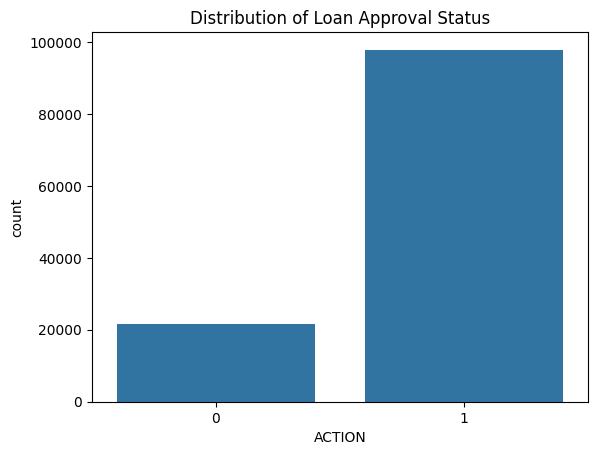

In [ ]:
# Distribution of loan approval status
sns.countplot(x='ACTION', data=data)
plt.title('Distribution of Loan Approval Status')
plt.show()

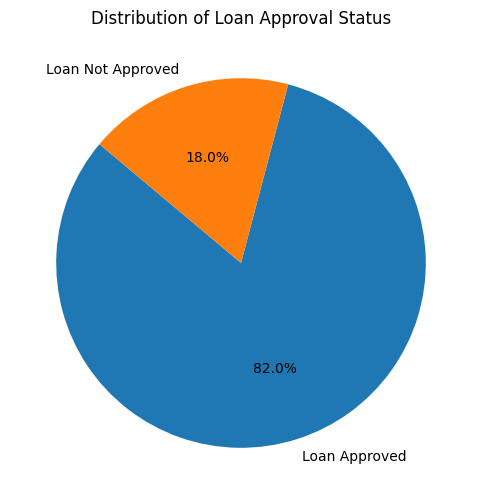

In [ ]:
loan_status_counts = data['ACTION'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(loan_status_counts, labels=['Loan Approved','Loan Not Approved'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Approval Status')
plt.show()


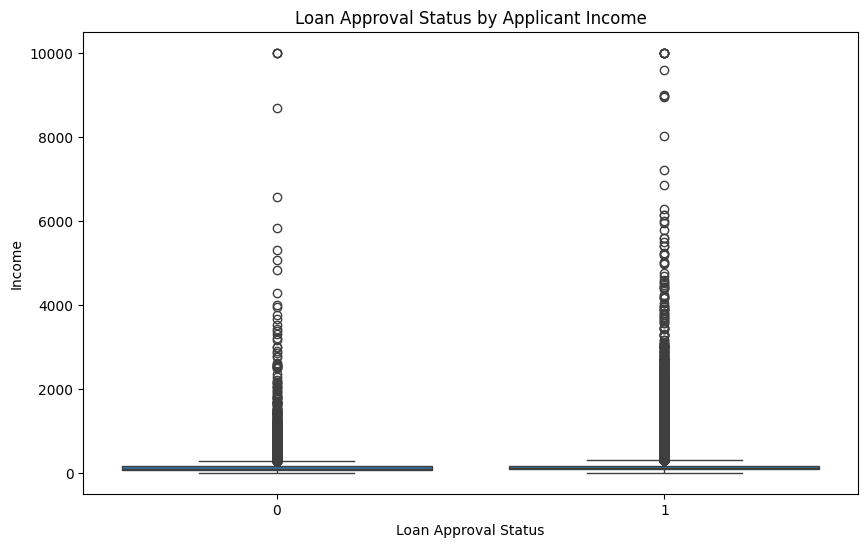

In [ ]:
# Loan Approval Status by Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='ACTION', y='APP_INCCH', data=data)
plt.title('Loan Approval Status by Applicant Income')
plt.xlabel('Loan Approval Status')
plt.ylabel('Income')
plt.show()

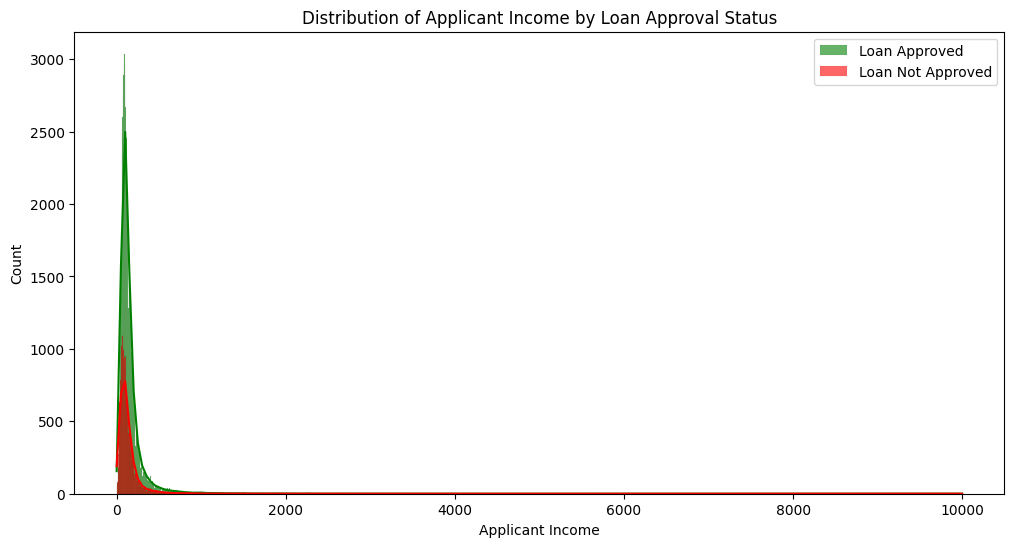

In [ ]:
# Filter data for approved and not approved loans
approved = data[data['ACTION'] == 1]['APP_INCCH']
not_approved = data[data['ACTION'] == 0]['APP_INCCH']

plt.figure(figsize=(12, 6))

sns.histplot(approved, color='green', kde=True, label='Loan Approved', alpha=0.6)
sns.histplot(not_approved, color='red', kde=True, label='Loan Not Approved', alpha=0.6)

plt.title('Distribution of Applicant Income by Loan Approval Status')
plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.legend()

plt.show()


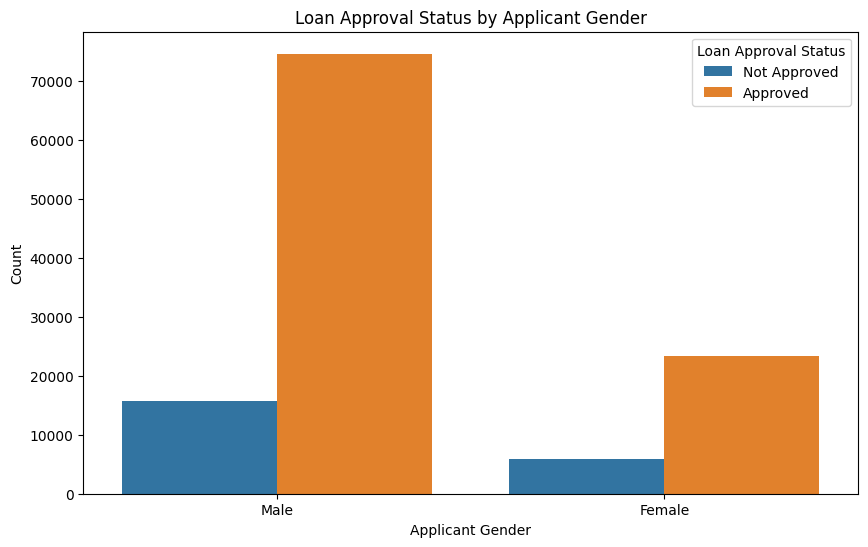

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='APP_SEX', hue='ACTION', data=data)
plt.title('Loan Approval Status by Applicant Gender')
plt.xlabel('Applicant Gender')
plt.ylabel('Count')
plt.legend(title='Loan Approval Status', labels=['Not Approved', 'Approved'])
plt.show()


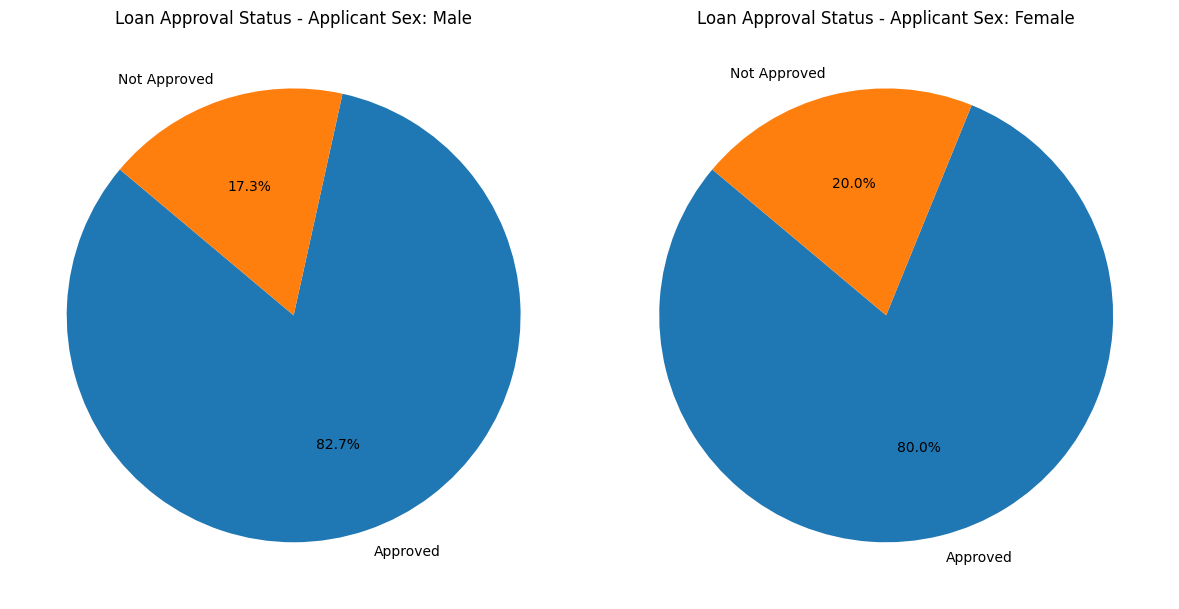

In [ ]:
sexes = data['APP_SEX'].unique()

fig, axes = plt.subplots(1, len(sexes), figsize=(12, 6))

for i, sex in enumerate(sexes):
    # Filter data for the current sex
    sex_data = data[data['APP_SEX'] == sex]
    # Calculate loan approval status counts
    status_counts = sex_data['ACTION'].value_counts(normalize=True)
    axes[i].pie(status_counts, labels=status_counts.index.map({0: 'Not Approved', 1: 'Approved'}), autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Loan Approval Status - Applicant Sex: {sex}')

plt.tight_layout()
plt.show()

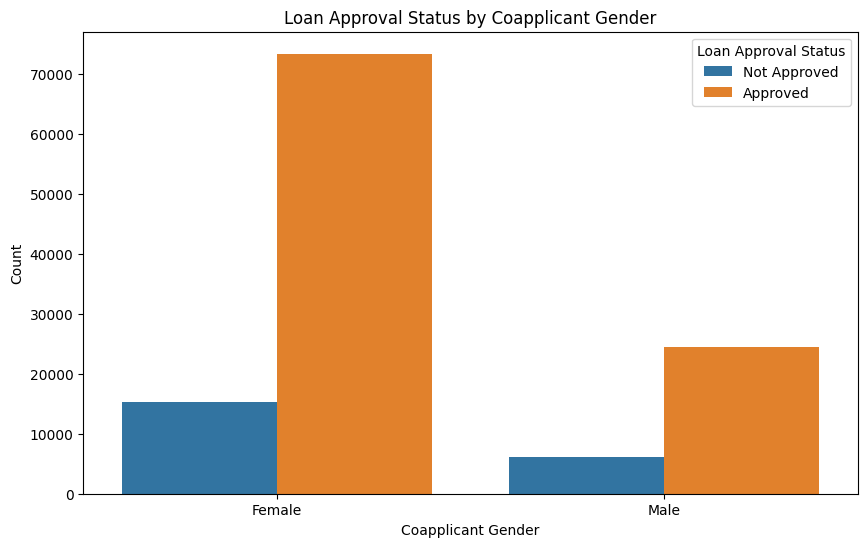

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='COAP_SEX', hue='ACTION', data=data)
plt.title('Loan Approval Status by Coapplicant Gender')
plt.xlabel('Coapplicant Gender')
plt.ylabel('Count')
plt.legend(title='Loan Approval Status', labels=['Not Approved', 'Approved'])
plt.show()


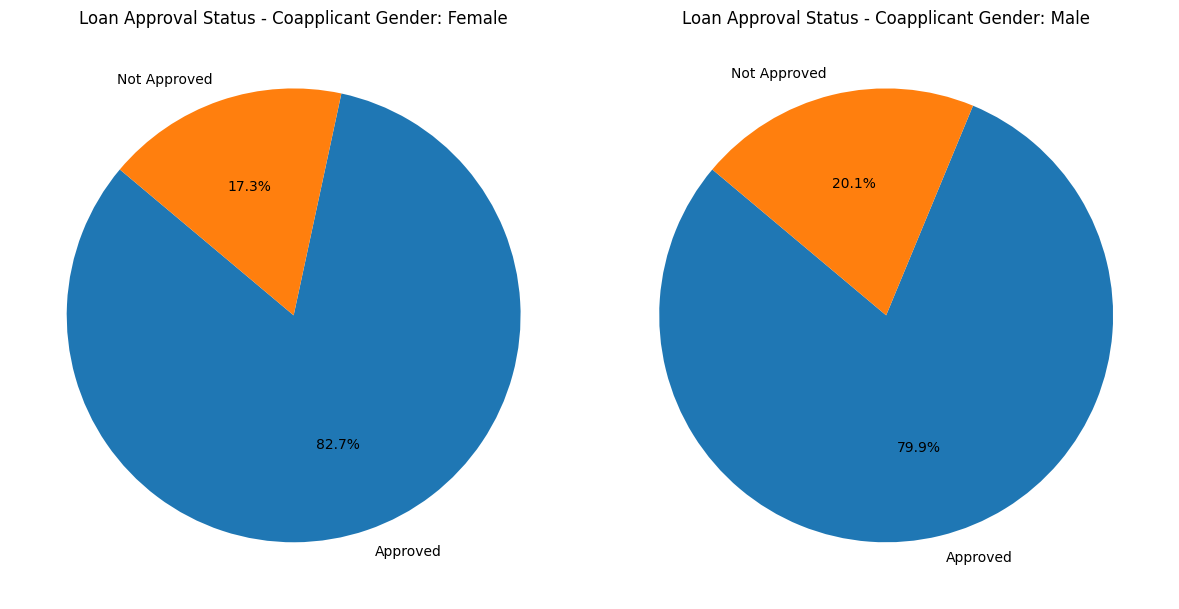

In [ ]:
genders = data['COAP_SEX'].unique()

fig, axes = plt.subplots(1, len(genders), figsize=(12, 6))

for i, gender in enumerate(genders):
    # Filter data for the current gender
    gender_data = data[data['COAP_SEX'] == gender]
    # Calculate loan approval status counts
    status_counts = gender_data['ACTION'].value_counts(normalize=True)
    axes[i].pie(status_counts, labels=status_counts.index.map({0: 'Not Approved', 1: 'Approved'}), autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Loan Approval Status - Coapplicant Gender: {gender}')

plt.tight_layout()
plt.show()

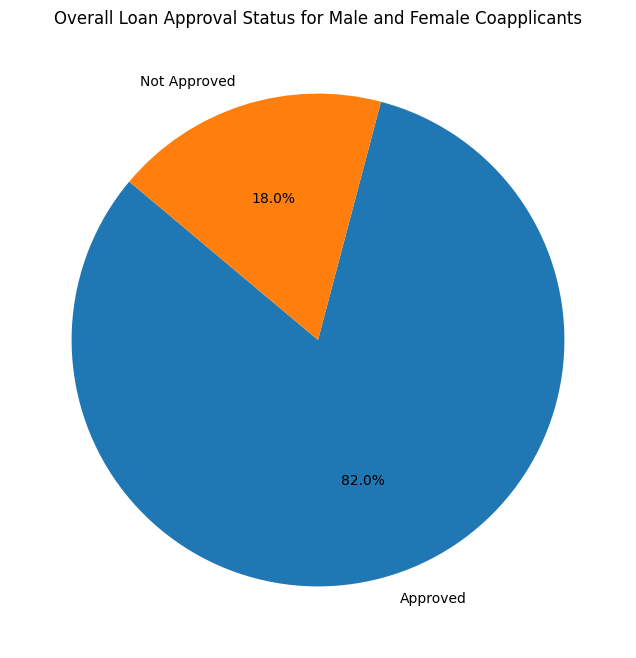

In [ ]:
filtered_data = data[data['COAP_SEX'].isin(['Male', 'Female'])]

# Calculate the overall loan approval status counts
overall_status_counts = filtered_data['ACTION'].value_counts(normalize=True)

# Plot a single pie chart for the overall loan approval status
plt.figure(figsize=(8, 8))
plt.pie(overall_status_counts, labels=overall_status_counts.index.map({0: 'Not Approved', 1: 'Approved'}), autopct='%1.1f%%', startangle=140)
plt.title('Overall Loan Approval Status for Male and Female Coapplicants')
plt.show()


In [ ]:
data.columns

Index(['YEAR', 'LOAN_TYPE', 'PROP_TYPE', 'PURPOSE', 'OCCUPANCY', 'LOAN_AMNT',
       'PRE_APP', 'ACTION', 'STATE', 'COUNTY', 'TRACT', 'APP_ETH', 'COAPP_ETH',
       'APP_RACE1', 'APP_SEX', 'COAP_SEX', 'APP_INCCH', 'POPCH', 'MINPOPCH',
       'MED_INCCH'],
      dtype='object')

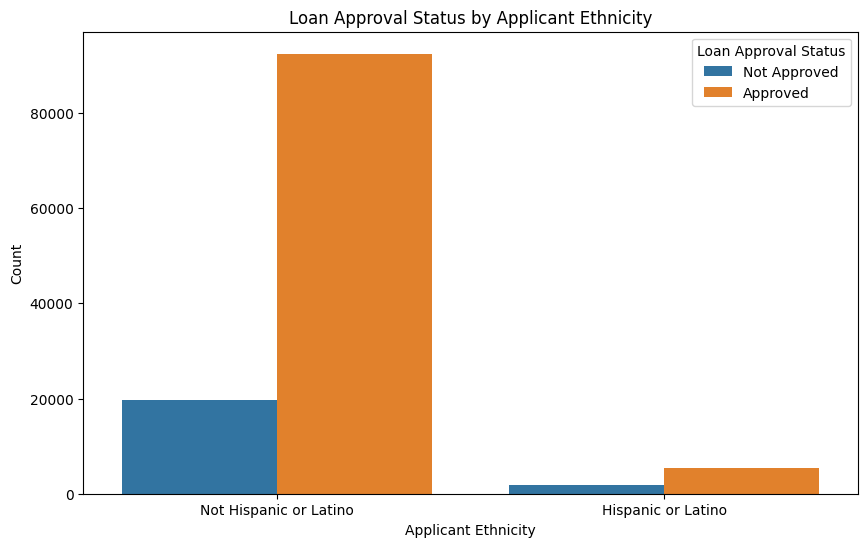

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='APP_ETH', hue='ACTION', data=data)
plt.title('Loan Approval Status by Applicant Ethnicity')
plt.xlabel('Applicant Ethnicity')
plt.ylabel('Count')
plt.legend(title='Loan Approval Status', labels=['Not Approved', 'Approved'])
plt.show()


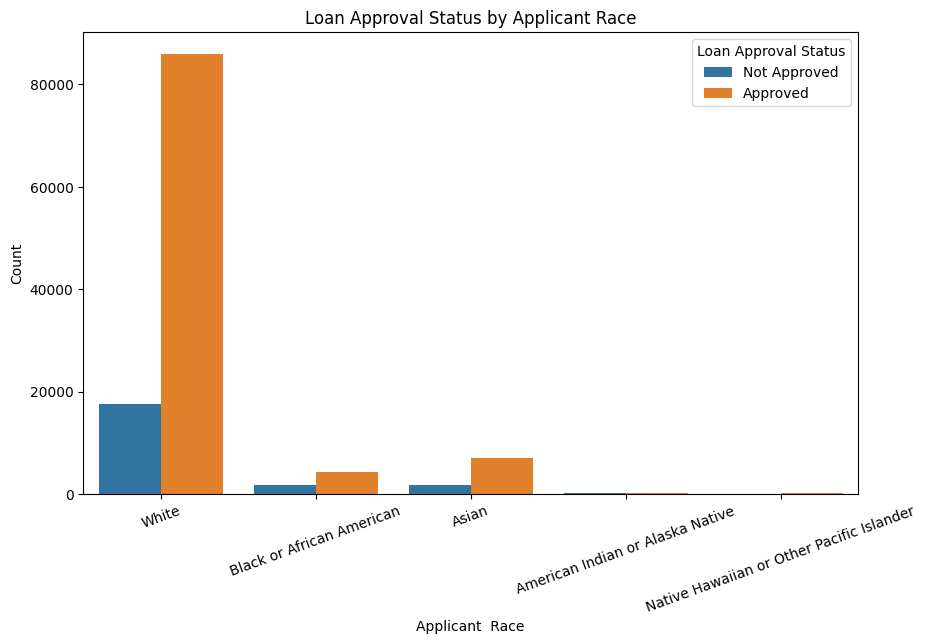

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='APP_RACE1', hue='ACTION', data=data)
plt.title('Loan Approval Status by Applicant Race')
plt.xlabel('Applicant  Race')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.legend(title='Loan Approval Status', labels=['Not Approved', 'Approved'])
plt.show()


In [ ]:
data.columns

Index(['YEAR', 'LOAN_TYPE', 'PROP_TYPE', 'PURPOSE', 'OCCUPANCY', 'LOAN_AMNT',
       'PRE_APP', 'ACTION', 'STATE', 'COUNTY', 'TRACT', 'APP_ETH', 'COAPP_ETH',
       'APP_RACE1', 'APP_SEX', 'COAP_SEX', 'APP_INCCH', 'POPCH', 'MINPOPCH',
       'MED_INCCH'],
      dtype='object')

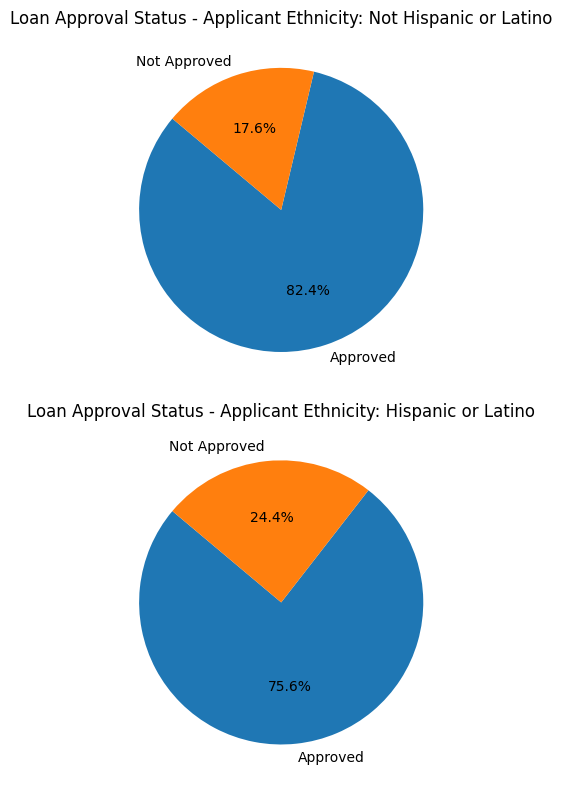

In [ ]:
import matplotlib.pyplot as plt

ethnicities = data['APP_ETH'].unique()

num_subplots = len(ethnicities)

fig, axes = plt.subplots(num_subplots, 1, figsize=(8, 4*num_subplots))

for i, ethnicity in enumerate(ethnicities):
    # Filter data for the current ethnicity
    ethnicity_data = data[data['APP_ETH'] == ethnicity]
    # Calculate loan approval status counts
    status_counts = ethnicity_data['ACTION'].value_counts(normalize=True)
    # Plot pie chart
    axes[i].pie(status_counts, labels=status_counts.index.map({0: 'Not Approved', 1: 'Approved'}), autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Loan Approval Status - Applicant Ethnicity: {ethnicity}')

plt.tight_layout()
plt.show()


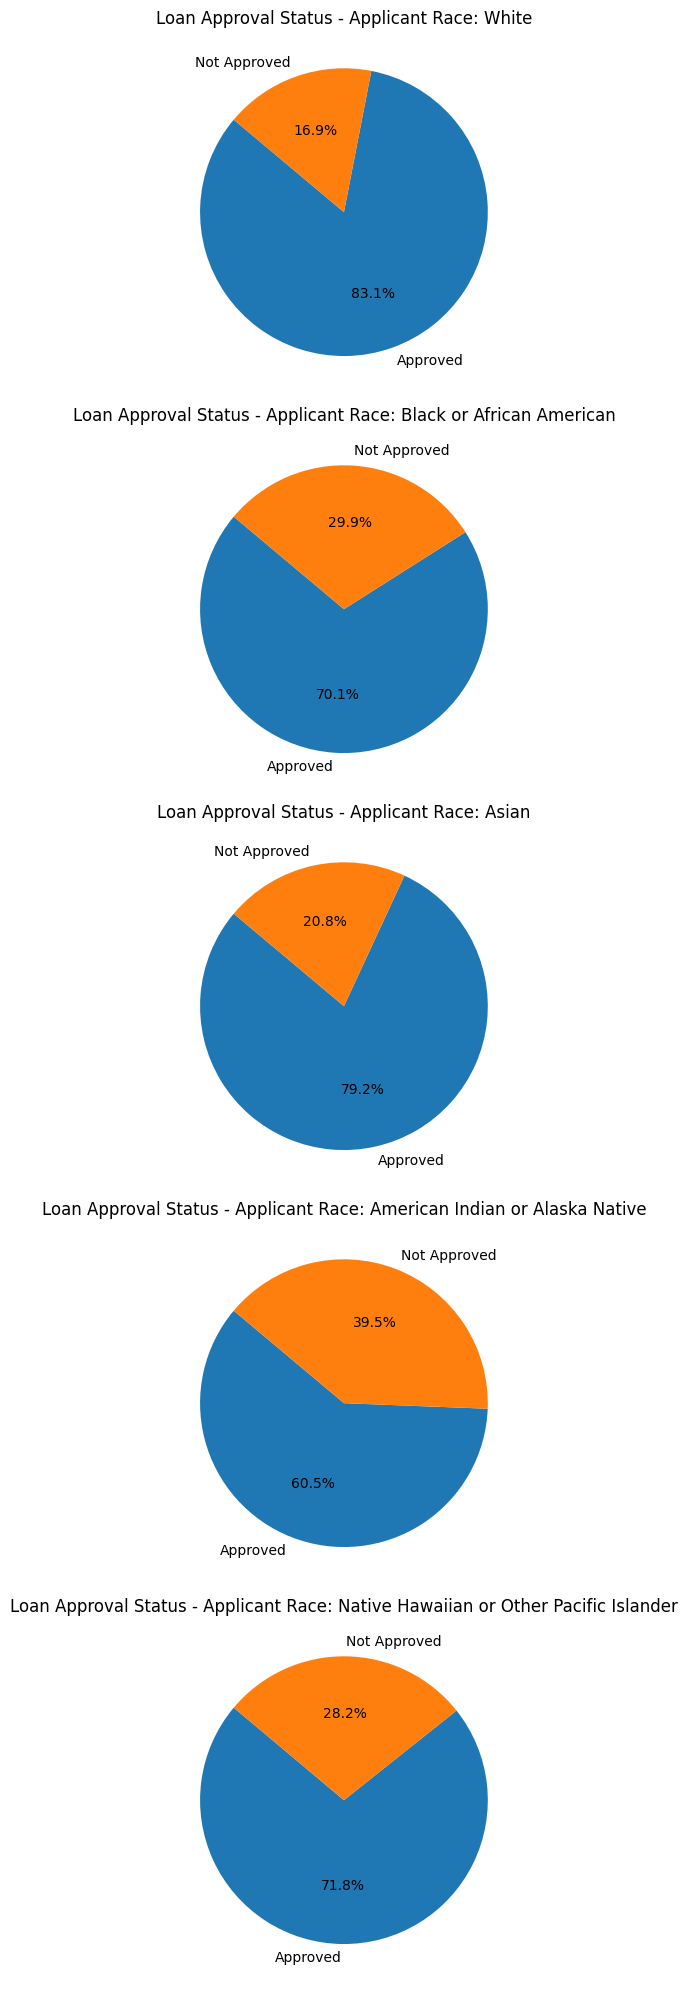

In [ ]:
import matplotlib.pyplot as plt

races = data['APP_RACE1'].unique()

num_subplots = len(races)

fig, axes = plt.subplots(num_subplots, 1, figsize=(8, 4*num_subplots))

for i, race in enumerate(races):
    # Filter data for the current race
    race_data = data[data['APP_RACE1'] == race]
    # Calculate loan approval status counts
    status_counts = race_data['ACTION'].value_counts(normalize=True)
    axes[i].pie(status_counts, labels=status_counts.index.map({0: 'Not Approved', 1: 'Approved'}), autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Loan Approval Status - Applicant Race: {race}')

plt.tight_layout()
plt.show()


In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/clean_hdma15.csv")

# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Include 'APP_RACE1' in the features
X = data.drop('ACTION', axis=1)
X['APP_RACE1'] = data['APP_RACE1']  # Add 'APP_RACE1' to X

# Split data into features and target
y = data['ACTION']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Create a DataFrame for predictions and true labels
predictions_df = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred, 'APP_RACE1': X_test[:, -1]})

# Calculate disparate impact
disparate_impact = {}

# Group the data by 'APP_RACE1' and calculate disparate impact
for group, group_data in predictions_df.groupby('APP_RACE1'):
    favorable_outcomes_protected = group_data[(group_data['y_pred'] == 1)].shape[0]
    total_protected = group_data.shape[0]
    disparate_impact[group] = favorable_outcomes_protected / total_protected

# Print disparate impact for each racial group
print("Disparate Impact:")
for group, impact in disparate_impact.items():
    print(f"Racial Group {group}: {impact}")


Disparate Impact:
Racial Group -1.2874312319013648: 0.9691629955947136
Racial Group -1.1228002476819963: 0.9405152224824356
Racial Group -0.9464099074469587: 0.9792843691148776
Racial Group -0.8699740933451092: 0.9867549668874173
Racial Group -0.8052976352589287: 0.9333333333333333
Racial Group -0.746500855180583: 0.9641873278236914
Racial Group -0.6230276170160566: 0.9799666110183639
Racial Group -0.5936292269768837: 0.9613759806879904
Racial Group -0.5524714809220416: 0.9732951835956127
Racial Group -0.45839663279668824: 0.9408404732762138
Racial Group -0.22908919049113946: 0.9625468164794008
Racial Group -0.11149563033444776: 1.0
Racial Group 0.2118866600964544: 0.9688208616780045
Racial Group 0.9468464110757775: 0.9575551782682513
Racial Group 1.75824197615695: 0.9657412876550502


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/clean_hdma15.csv")

# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Define significant race identifiers
significant_races = [1, 2, 3, 4, 5]

# Filter data to include only significant race identifiers
data_filtered = data[data['APP_RACE1'].isin(significant_races)]

# Split data into features and target
X = data_filtered.drop('ACTION', axis=1)
y = data_filtered['ACTION']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Predictions
y_pred = xgb_classifier.predict(X_test)

# Create a DataFrame for predictions and true labels
predictions_df = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred, 'APP_RACE1': X_test[:, X.columns.get_loc('APP_RACE1')]})

# Calculate disparate impact
disparate_impact = {}

# Group the data by 'APP_RACE1' and calculate disparate impact
for group, group_data in predictions_df.groupby('APP_RACE1'):
    favorable_outcomes_protected = group_data[(group_data['y_pred'] == 1)].shape[0]
    total_protected = group_data.shape[0]
    disparate_impact[group] = favorable_outcomes_protected / total_protected

# Print disparate impact for each racial group
print("Disparate Impact:")
for group, impact in disparate_impact.items():
    print(f"Racial Group {group}: {impact}")


Disparate Impact:
Racial Group -3.016565151403743: 0.9461709211986682
Racial Group -1.8851792727950505: 0.8257956448911222
Racial Group -0.753793394186358: 0.8625
Racial Group 0.37759248442233445: 0.9639235004346566


MODEL Code- Rakshith..


BASE MODEL - LogReg

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/clean_hdma15.csv")

# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split data into features and target
X = data.drop('ACTION', axis=1)
y = data['ACTION']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8253362946821439
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.14      0.22      4332
           1       0.84      0.98      0.90     19531

    accuracy                           0.83     23863
   macro avg       0.71      0.56      0.56     23863
weighted avg       0.79      0.83      0.78     23863



XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/clean_hdma15.csv")

# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split data into features and target
X = data.drop('ACTION', axis=1)
y = data['ACTION']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Define the hyperparameters grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.8266353769433852
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.11      0.18      4332
           1       0.83      0.99      0.90     19531

    accuracy                           0.83     23863
   macro avg       0.73      0.55      0.54     23863
weighted avg       0.80      0.83      0.77     23863



BASE MODEL - RF

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data =pd.read_csv("/content/drive/MyDrive/clean_hdma15.csv")

# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split data into features and target
X = data.drop('ACTION', axis=1)
y = data['ACTION']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8169132129237732
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.16      0.24      4332
           1       0.84      0.96      0.90     19531

    accuracy                           0.82     23863
   macro avg       0.66      0.56      0.57     23863
weighted avg       0.77      0.82      0.78     23863



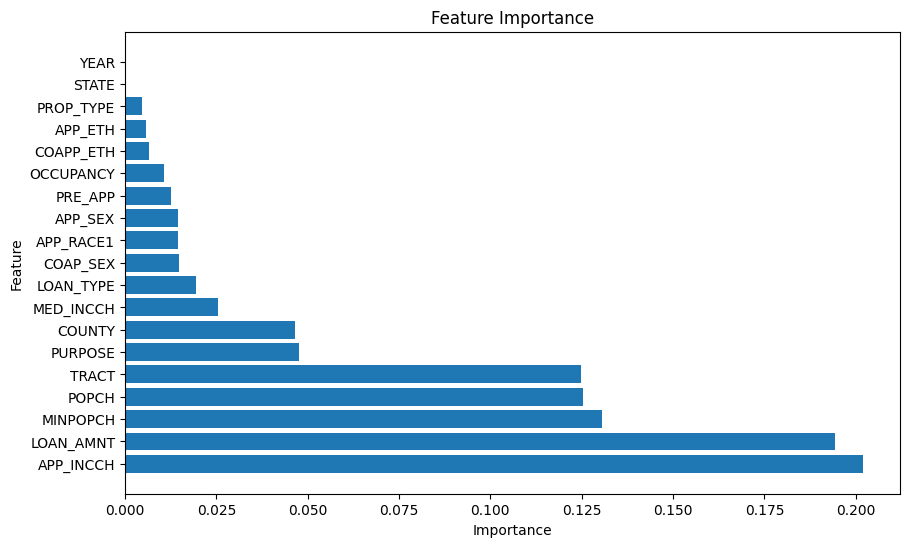

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a dataframe to hold feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the dataframe by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


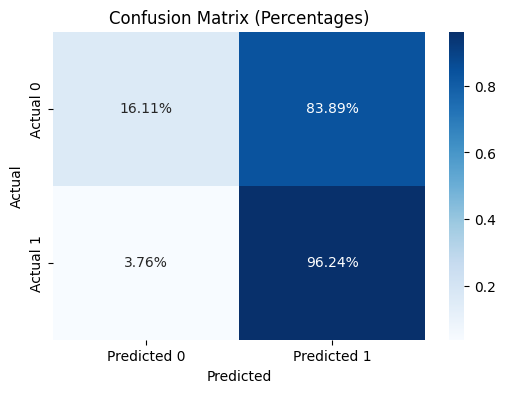

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate percentages for each cell in the confusion matrix
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Percentages)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(conf_matrix)

[[  698  3634]
 [  735 18796]]


In [ ]:
# Reverse encoding for categorical features
for column in data.select_dtypes(include=['object']).columns:
    X_test[column] = label_encoders[column].inverse_transform(X_test[column])

# Inverse transform numerical features
X_test = pd.DataFrame(scaler.inverse_transform(X_test), columns=X.columns)


In [ ]:
X_test.head()

,YEAR,LOAN_TYPE,PROP_TYPE,PURPOSE,OCCUPANCY,LOAN_AMNT,PRE_APP,STATE,COUNTY,TRACT,APP_ETH,COAPP_ETH,APP_RACE1,APP_SEX,COAP_SEX,APP_INCCH,POPCH,MINPOPCH,MED_INCCH
0,2015.0,1.0,1.0,1.0,1.0,205.0,2.0,0.0,0.0,136.01,1.0,1.0,4.0,1.0,0.0,78.0,9372.0,15.410000,82700.0
1,2015.0,1.0,1.0,2.0,1.0,8.0,3.0,0.0,57.0,870.00,1.0,1.0,4.0,1.0,0.0,65.0,3782.0,3.170000,65400.0
2,2015.0,1.0,1.0,3.0,1.0,170.0,3.0,0.0,32.0,239.02,1.0,1.0,4.0,1.0,0.0,63.0,1971.0,2.640000,63000.0
3,2015.0,1.0,1.0,1.0,1.0,167.0,2.0,0.0,55.0,9522.00,1.0,1.0,4.0,1.0,0.0,82.0,3815.0,16.639999,75200.0
4,2015.0,1.0,1.0,1.0,1.0,543.0,1.0,0.0,59.0,102.00,1.0,1.0,4.0,1.0,1.0,250.0,4738.0,14.580000,71300.0


In [ ]:
# Append y_test and y_pred to X_test
X_test['Actual'] = y_test
X_test['Predicted'] = y_pred

# Print the updated X_test
print("X_test with Actual and Predicted columns:")
X_test.head()


X_test with Actual and Predicted columns:


,YEAR,LOAN_TYPE,PROP_TYPE,PURPOSE,OCCUPANCY,LOAN_AMNT,PRE_APP,STATE,COUNTY,TRACT,...,COAPP_ETH,APP_RACE1,APP_SEX,COAP_SEX,APP_INCCH,POPCH,MINPOPCH,MED_INCCH,Actual,Predicted
0,2015.0,1.0,1.0,1.0,1.0,205.0,2.0,0.0,0.0,136.01,...,1.0,4.0,1.0,0.0,78.0,9372.0,15.410000,82700.0,1.0,0.962646
1,2015.0,1.0,1.0,2.0,1.0,8.0,3.0,0.0,57.0,870.00,...,1.0,4.0,1.0,0.0,65.0,3782.0,3.170000,65400.0,NaN,0.779123
2,2015.0,1.0,1.0,3.0,1.0,170.0,3.0,0.0,32.0,239.02,...,1.0,4.0,1.0,0.0,63.0,1971.0,2.640000,63000.0,NaN,0.742389
3,2015.0,1.0,1.0,1.0,1.0,167.0,2.0,0.0,55.0,9522.00,...,1.0,4.0,1.0,0.0,82.0,3815.0,16.639999,75200.0,1.0,0.927435
4,2015.0,1.0,1.0,1.0,1.0,543.0,1.0,0.0,59.0,102.00,...,1.0,4.0,1.0,1.0,250.0,4738.0,14.580000,71300.0,NaN,0.954753


In [ ]:
# Count NaN values in the 'Actual' column of X_test
nan_count = X_test['Actual'].isna().sum()

# Print the count of NaN values
print("Count of NaN values in the 'Actual' column of X_test:", nan_count)

# Drop rows with NaN values in the 'Actual' column
X_test = X_test.dropna(subset=['Actual'])

# Print the updated shape of X_test after dropping NaN rows
print("Shape of X_test after dropping rows with NaN values in the 'Actual' column:", X_test.shape)


Count of NaN values in the 'Actual' column of X_test: 19017
Shape of X_test after dropping rows with NaN values in the 'Actual' column: (4846, 21)


In [ ]:
# Group by 'APP_RACE1' and 'Predicted', then count occurrences
race_predicted_counts = X_test.groupby(['APP_RACE1', 'Predicted']).size().unstack(fill_value=0)

# Print the count of predicted values for each category of 'APP_RACE1'
print("App_Race1 wise count for predicted values:")
print(race_predicted_counts)


App_Race1 wise count for predicted values:
Predicted  0.000009  0.000285  0.013928  0.153118  0.176012  0.176491  \
APP_RACE1                                                               
0.0               0         0         0         0         0         0   
1.0               0         0         0         0         0         0   
2.0               0         0         0         0         0         0   
3.0               0         0         0         0         0         0   
4.0               1         1         1         1         1         1   

Predicted  0.182836  0.234517  0.235099  0.257220  ...  0.978391  0.978539  \
APP_RACE1                                          ...                       
0.0               0         0         0         0  ...         0         0   
1.0               1         0         0         0  ...         0         0   
2.0               0         0         0         0  ...         0         0   
3.0               0         0         0         0  ... 

American Indian or Alaska Native: APP_RACE == 1
Asian: APP_RACE == 2
Black or African American: APP_RACE == 3
Native Hawaiian or Other Pacific Islander: APP_RACE == 4
White: APP_RACE == 5

Transformed to 0 to 4

In [ ]:
# Group by 'APP_RACE1' and 'Actual', then count occurrences
race_actual_counts = X_test.groupby(['APP_RACE1', 'Actual']).size().unstack(fill_value=0)

# Calculate total count of actual values for each category of 'APP_RACE1'
race_total_counts = race_actual_counts.sum(axis=1)

# Calculate percentage of actual values (0 and 1) for each category of 'APP_RACE1'
race_actual_percentage = race_actual_counts.divide(race_total_counts, axis=0) * 100

# Print the percentage of actual values (0 and 1) for each category of 'APP_RACE1'
print("App_Race1 wise percentage for actual values (0 and 1):")
print(race_actual_percentage)


App_Race1 wise percentage for actual values (0 and 1):
Actual           0.0        1.0
APP_RACE1                      
0.0        22.222222  77.777778
1.0        13.186813  86.813187
2.0        12.692308  87.307692
3.0        18.181818  81.818182
4.0        14.500358  85.499642


In [ ]:
# Group by 'APP_RACE1' and 'Actual', then count occurrences
race_actual_counts = X_test.groupby(['APP_RACE1', 'Predicted']).size().unstack(fill_value=0)

# Calculate total count of actual values for each category of 'APP_RACE1'
race_total_counts = race_actual_counts.sum(axis=1)

# Calculate percentage of actual values (0 and 1) for each category of 'APP_RACE1'
race_actual_percentage = race_actual_counts.divide(race_total_counts, axis=0) * 100

# Print the percentage of actual values (0 and 1) for each category of 'APP_RACE1'
print("App_Race1 wise percentage for actual values (0 and 1):")
print(race_actual_percentage)


App_Race1 wise percentage for actual values (0 and 1):
Predicted  0.000009  0.000285  0.013928  0.153118  0.176012  0.176491  \
APP_RACE1                                                               
0.0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2.0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3.0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4.0        0.023849  0.023849  0.023849  0.023849  0.023849  0.023849   

Predicted  0.182836  0.234517  0.235099  0.257220  ...  0.978391  0.978539  \
APP_RACE1                                          ...                       
0.0        0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1.0        0.274725  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
2.0        0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
3.0        0.000000  0.000000  0.000000  0.

**BIAS MITIGATION THROUGH CLASS WEIGHTS - (LITTLE IMPROVEMENT)**

METHOD 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/clean_hdma15.csv")

# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split data into features and target
X = data.drop('ACTION', axis=1)
y = data['ACTION']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#reweighting the training samples, modifying the decision threshold
# Calculate class weights based on the actual distribution of classes
class_counts = y_train.value_counts()
class_weights = {0: class_counts[1] / class_counts[0], 1: 1}

# Initialize and train Random Forest Classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8177094246322759
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.14      0.21      4332
           1       0.83      0.97      0.90     19531

    accuracy                           0.82     23863
   macro avg       0.66      0.55      0.55     23863
weighted avg       0.77      0.82      0.77     23863



METHOD 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/clean_hdma15.csv")

# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split data into features and target
X = data.drop('ACTION', axis=1)
y = data['ACTION']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE oversampling
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7683442987051083
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.39      0.38      4332
           1       0.86      0.85      0.86     19531

    accuracy                           0.77     23863
   macro avg       0.62      0.62      0.62     23863
weighted avg       0.77      0.77      0.77     23863



In [ ]:
# Reverse encoding for categorical features
for column in data.select_dtypes(include=['object']).columns:
    X_test[column] = label_encoders[column].inverse_transform(X_test[column])

# Inverse transform numerical features
X_test = pd.DataFrame(scaler.inverse_transform(X_test), columns=X.columns)


# Append y_test and y_pred to X_test
X_test['Actual'] = y_test
X_test['Predicted'] = y_pred

# Print the updated X_test
print("X_test with Actual and Predicted columns:")
X_test.head()


X_test with Actual and Predicted columns:


,YEAR,LOAN_TYPE,PROP_TYPE,PURPOSE,OCCUPANCY,LOAN_AMNT,PRE_APP,STATE,COUNTY,TRACT,...,COAPP_ETH,APP_RACE1,APP_SEX,COAP_SEX,APP_INCCH,POPCH,MINPOPCH,MED_INCCH,Actual,Predicted
0,2015.0,1.0,1.0,1.0,1.0,205.0,2.0,0.0,0.0,136.01,...,1.0,4.0,1.0,0.0,78.0,9372.0,15.410000,82700.0,1.0,1
1,2015.0,1.0,1.0,2.0,1.0,8.0,3.0,0.0,57.0,870.00,...,1.0,4.0,1.0,0.0,65.0,3782.0,3.170000,65400.0,NaN,1
2,2015.0,1.0,1.0,3.0,1.0,170.0,3.0,0.0,32.0,239.02,...,1.0,4.0,1.0,0.0,63.0,1971.0,2.640000,63000.0,NaN,0
3,2015.0,1.0,1.0,1.0,1.0,167.0,2.0,0.0,55.0,9522.00,...,1.0,4.0,1.0,0.0,82.0,3815.0,16.639999,75200.0,1.0,1
4,2015.0,1.0,1.0,1.0,1.0,543.0,1.0,0.0,59.0,102.00,...,1.0,4.0,1.0,1.0,250.0,4738.0,14.580000,71300.0,NaN,1


In [ ]:
# Count NaN values in the 'Actual' column of X_test
nan_count = X_test['Actual'].isna().sum()

# Print the count of NaN values
print("Count of NaN values in the 'Actual' column of X_test:", nan_count)

# Drop rows with NaN values in the 'Actual' column
X_test = X_test.dropna(subset=['Actual'])

# Print the updated shape of X_test after dropping NaN rows
print("Shape of X_test after dropping rows with NaN values in the 'Actual' column:", X_test.shape)


Count of NaN values in the 'Actual' column of X_test: 19017
Shape of X_test after dropping rows with NaN values in the 'Actual' column: (4846, 21)


In [ ]:
# Group by 'APP_RACE1' and 'Actual', then count occurrences
race_actual_counts = X_test.groupby(['APP_RACE1', 'Actual']).size().unstack(fill_value=0)

# Calculate total count of actual values for each category of 'APP_RACE1'
race_total_counts = race_actual_counts.sum(axis=1)

# Calculate percentage of actual values (0 and 1) for each category of 'APP_RACE1'
race_actual_percentage = race_actual_counts.divide(race_total_counts, axis=0) * 100

# Print the percentage of actual values (0 and 1) for each category of 'APP_RACE1'
print("App_Race1 wise percentage for actual values (0 and 1):")
print(race_actual_percentage)


App_Race1 wise percentage for actual values (0 and 1):
Actual           0.0        1.0
APP_RACE1                      
0.0        22.222222  77.777778
1.0        13.186813  86.813187
2.0        12.692308  87.307692
3.0        18.181818  81.818182
4.0        14.500358  85.499642


In [ ]:
# Group by 'APP_RACE1' and 'Predicted', then count occurrences
race_predicted_counts = X_test.groupby(['APP_RACE1', 'Predicted']).size().unstack(fill_value=0)

# Calculate total count of predicted values for each category of 'APP_RACE1'
race_predicted_total_counts = race_predicted_counts.sum(axis=1)

# Calculate percentage of predicted values (0 and 1) for each category of 'APP_RACE1'
race_predicted_percentage = race_predicted_counts.divide(race_predicted_total_counts, axis=0) * 100

# Print the percentage of predicted values (0 and 1) for each category of 'APP_RACE1'
print("App_Race1 wise percentage for predicted values (0 and 1):")
print(race_predicted_percentage)


App_Race1 wise percentage for predicted values (0 and 1):
Predicted          0          1
APP_RACE1                      
0.0        27.777778  72.222222
1.0        21.153846  78.846154
2.0        34.615385  65.384615
3.0        36.363636  63.636364
4.0        18.960172  81.039828


In [ ]:
'''
method 1

App_Race1 wise percentage for predicted values (0 and 1):
Predicted          0          1
APP_RACE1
0.0        22.222222  77.777778
1.0         3.846154  96.153846
2.0        14.615385  85.384615
3.0         9.090909  90.909091
4.0         5.747675  94.252325

'''

**MITIGATION THROUGH ADVERSARY MODEL**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/clean_hdma15.csv")

# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split data into features and target
X = data.drop('ACTION', axis=1)
y = data['ACTION']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the input shape
input_shape = X_train.shape[1]

# Define the main model
input_layer = tf.keras.Input(shape=(input_shape,))
hidden_layer = Dense(64, activation='relu')(input_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)

main_model = Model(inputs=input_layer, outputs=output_layer)

# Define the adversary model
adversary_layer = Dense(64, activation='relu')(hidden_layer)
adversary_output = Dense(1, activation='sigmoid')(adversary_layer)

adversary_model = Model(inputs=input_layer, outputs=adversary_output)

# Compile the main model
main_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Compile the adversary model
adversary_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Train the models alternately
num_epochs = 10
for epoch in range(num_epochs):
    # Train the main model
    main_model.fit(X_train, y_train, batch_size=32, epochs=1, verbose=1)

    # Freeze the weights of the main model
    for layer in main_model.layers:
        layer.trainable = False

    # Train the adversary model
    adversary_model.fit(X_train, y_train, batch_size=32, epochs=1, verbose=1)

    # Unfreeze the weights of the main model
    for layer in main_model.layers:
        layer.trainable = True

# Predictions
y_pred = main_model.predict(X_test)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))


746/746 [==============================] - 1s 2ms/step
Accuracy: 0.823199094833005
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.10      0.18      4332
           1       0.83      0.98      0.90     19531

    accuracy                           0.82     23863
   macro avg       0.70      0.54      0.54     23863
weighted avg       0.78      0.82      0.77     23863



In [ ]:
# Reverse encoding for categorical features
for column in data.select_dtypes(include=['object']).columns:
    X_test[column] = label_encoders[column].inverse_transform(X_test[column])

# Inverse transform numerical features
X_test = pd.DataFrame(scaler.inverse_transform(X_test), columns=X.columns)


# Append y_test and y_pred to X_test
X_test['Actual'] = y_test
X_test['Predicted'] = y_pred

# Print the updated X_test
print("X_test with Actual and Predicted columns:")
X_test.head()


X_test with Actual and Predicted columns:


,YEAR,LOAN_TYPE,PROP_TYPE,PURPOSE,OCCUPANCY,LOAN_AMNT,PRE_APP,STATE,COUNTY,TRACT,...,COAPP_ETH,APP_RACE1,APP_SEX,COAP_SEX,APP_INCCH,POPCH,MINPOPCH,MED_INCCH,Actual,Predicted
0,2015.0,1.0,1.0,1.0,1.0,205.0,2.0,0.0,0.0,136.01,...,1.0,4.0,1.0,0.0,78.0,9372.0,15.410000,82700.0,1.0,0.941122
1,2015.0,1.0,1.0,2.0,1.0,8.0,3.0,0.0,57.0,870.00,...,1.0,4.0,1.0,0.0,65.0,3782.0,3.170000,65400.0,NaN,0.778262
2,2015.0,1.0,1.0,3.0,1.0,170.0,3.0,0.0,32.0,239.02,...,1.0,4.0,1.0,0.0,63.0,1971.0,2.640000,63000.0,NaN,0.738154
3,2015.0,1.0,1.0,1.0,1.0,167.0,2.0,0.0,55.0,9522.00,...,1.0,4.0,1.0,0.0,82.0,3815.0,16.639999,75200.0,1.0,0.917965
4,2015.0,1.0,1.0,1.0,1.0,543.0,1.0,0.0,59.0,102.00,...,1.0,4.0,1.0,1.0,250.0,4738.0,14.580000,71300.0,NaN,0.955374


In [ ]:
import numpy as np

# Adjust predicted values based on the condition
X_test['Predicted'] = np.where(X_test['Predicted'] > 0.5, 1, 0)

# Print the updated DataFrame
X_test.head()


,YEAR,LOAN_TYPE,PROP_TYPE,PURPOSE,OCCUPANCY,LOAN_AMNT,PRE_APP,STATE,COUNTY,TRACT,...,COAPP_ETH,APP_RACE1,APP_SEX,COAP_SEX,APP_INCCH,POPCH,MINPOPCH,MED_INCCH,Actual,Predicted
0,2015.0,1.0,1.0,1.0,1.0,205.0,2.0,0.0,0.0,136.01,...,1.0,4.0,1.0,0.0,78.0,9372.0,15.410000,82700.0,1.0,1
3,2015.0,1.0,1.0,1.0,1.0,167.0,2.0,0.0,55.0,9522.00,...,1.0,4.0,1.0,0.0,82.0,3815.0,16.639999,75200.0,1.0,1
23,2015.0,1.0,1.0,1.0,1.0,170.0,3.0,0.0,33.0,113.00,...,1.0,4.0,1.0,0.0,69.0,2573.0,3.380000,68500.0,1.0,1
31,2015.0,3.0,1.0,1.0,1.0,365.0,2.0,0.0,59.0,17.00,...,1.0,2.0,1.0,0.0,95.0,6517.0,33.540001,71300.0,1.0,1
35,2015.0,1.0,1.0,3.0,1.0,326.0,3.0,0.0,42.0,146.05,...,1.0,4.0,1.0,0.0,165.0,3836.0,11.810000,71300.0,1.0,1


In [ ]:
# Count NaN values in the 'Actual' column of X_test
nan_count = X_test['Actual'].isna().sum()

# Print the count of NaN values
print("Count of NaN values in the 'Actual' column of X_test:", nan_count)

# Drop rows with NaN values in the 'Actual' column
X_test = X_test.dropna(subset=['Actual'])

# Print the updated shape of X_test after dropping NaN rows
print("Shape of X_test after dropping rows with NaN values in the 'Actual' column:", X_test.shape)


Count of NaN values in the 'Actual' column of X_test: 0
Shape of X_test after dropping rows with NaN values in the 'Actual' column: (4846, 21)


In [ ]:
# Group by 'APP_RACE1' and 'Actual', then count occurrences
race_actual_counts = X_test.groupby(['APP_RACE1', 'Actual']).size().unstack(fill_value=0)

# Calculate total count of actual values for each category of 'APP_RACE1'
race_total_counts = race_actual_counts.sum(axis=1)

# Calculate percentage of actual values (0 and 1) for each category of 'APP_RACE1'
race_actual_percentage = race_actual_counts.divide(race_total_counts, axis=0) * 100

# Print the percentage of actual values (0 and 1) for each category of 'APP_RACE1'
print("App_Race1 wise percentage for actual values (0 and 1):")
print(race_actual_percentage)


App_Race1 wise percentage for actual values (0 and 1):
Actual           0.0        1.0
APP_RACE1                      
0.0        22.222222  77.777778
1.0        13.186813  86.813187
2.0        12.692308  87.307692
3.0        18.181818  81.818182
4.0        14.500358  85.499642


In [ ]:
# Group by 'APP_RACE1' and 'Predicted', then count occurrences
race_predicted_counts = X_test.groupby(['APP_RACE1', 'Predicted']).size().unstack(fill_value=0)

# Calculate total count of predicted values for each category of 'APP_RACE1'
race_predicted_total_counts = race_predicted_counts.sum(axis=1)

# Calculate percentage of predicted values (0 and 1) for each category of 'APP_RACE1'
race_predicted_percentage = race_predicted_counts.divide(race_predicted_total_counts, axis=0) * 100

# Print the percentage of predicted values (0 and 1) for each category of 'APP_RACE1'
print("App_Race1 wise percentage for predicted values (0 and 1):")
print(race_predicted_percentage)


App_Race1 wise percentage for predicted values (0 and 1):
Predicted          0           1
APP_RACE1                       
0.0        11.111111   88.888889
1.0         4.945055   95.054945
2.0        10.769231   89.230769
3.0         0.000000  100.000000
4.0         2.384927   97.615073


Retrieved predictions and analysis

In [ ]:
# Calculate the total number of correct predictions
correct_predictions = ((X_test['Actual'] == X_test['Predicted']).sum())

# Calculate the total number of predictions
total_predictions = len(X_test)

# Calculate the accuracy
accuracy = correct_predictions / total_predictions * 100

# Print the accuracy
print("Accuracy of the model:", accuracy)


Accuracy of the model: 83.67725959554272


In [ ]:
'''
original

App_Race1 wise percentage for predicted values (0 and 1):
Predicted          0          1
APP_RACE1
0.0        22.222222  77.777778
1.0         3.846154  96.153846
2.0        14.615385  85.384615
3.0         9.090909  90.909091
4.0         5.747675  94.252325
'''

'''
first method

App_Race1 wise percentage for predicted values (0 and 1):
Predicted          0          1
APP_RACE1
0.0        11.111111  88.888889
1.0         3.021978  96.978022
2.0        13.461538  86.538462
3.0         9.090909  90.909091
4.0         4.817553  95.182447

'''

'\nfirst method\n\nApp_Race1 wise percentage for predicted values (0 and 1):\nPredicted          0          1\nAPP_RACE1\n0.0        11.111111  88.888889\n1.0         3.021978  96.978022\n2.0        13.461538  86.538462\n3.0         9.090909  90.909091\n4.0         4.817553  95.182447\n\n'